## Install Necessary Libraries

In [1]:
# ! pip3 install torch
# ! pip3 install torchvision
# ! pip3 install pandas numpy matplotlib scikit-learn
# ! pip3 install --upgrade pip
# ! pip install torchinfo

## Milestones: 

- <a href="#problem"> Problem/case definition </a>

- <a href="#data-sourcing"> Data sourcing </a>

- <a href="#data-cleaning"> Data cleaning and preparation </a>

- <a href="#data-analysis"> Data Analysis and Exploration</a>

- <a href="#model-training"> Model training and Experimentations </a>

- <a href="#model-prediction"> Model serving and demonstration </a>

<p id="problem"></p>

# Problem/Case Definition

The most prevalent traffic issue is driver recklessness, which has become increasingly problematic as the number of vehicles on the road increases. The primary objective of Advanced Intelligent Transportation Systems (AITS) is to improve human safety and save lives. AITS are complex computer programmes that attempt to offer new capabilities connected to various modes of transportation and traffic management. It contributes to the automation, adaption, and improvement of the driving experience. <br>

<img src="https://storage.googleapis.com/kaggle-datasets-images/1014124/1710326/002ebdf428433a38826952887b0f8730/dataset-cover.jpg?t=2020-12-03-20-24-55">

<p id='data-sourcing'></p>

# Data sourcing 
The essential data was generated by simulating real-time driving with the Udacity Self-Driving Car Simulator software tool, which is meant to provide a virtual environment for learning and experimenting with autonomous driving. 

This enables us to design and test the self-driving algorithm without requiring physical vehicles. So far, we have generated around 20,000 rows of data for training the model. This data set includes 30,000 photos of simulated automobile driving in real-world settings including city streets, motorways, and crossings, allowing us to train and test our models in a safe yet relevant context.

Source: https://github.com/udacity/self-driving-car-sim

### Configuration
For planning and organising driving simulations, the programme includes unique graphic resolutions and quality options that are set before starting the simulations. 
<img src="assets/udacity_software_configuration.png" style="max-height: 40em"/>


The self driving programme comes in 2 modes:
- Training Mode: The training mode simulates real-world vehicle incidents. We may design scenarios to test and improve the effectiveness of our algorithms in challenging and unusual situations.
- Autonomous Mode: The autonomous mode is used to assess the result and performance of our model once it has been trained.
    
<img src="assets/udacity_software_mode_selection.png" style="max-height: 40em"/>

### Data Generation
- Images from the centre, left, and right cameras are recorded, together with the corresponding steering angle, speed, throttle, and brake.
- The data generated are saved to a CSV table **(data/driving_log.csv)** for analysis

<p id="data-cleaning"></p>

# Data cleaning and preparation

In [50]:
from zipfile import ZipFile

with ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/driving_log.csv', names=['center_img', 'left_img', 'right_img', 'steering', 'throttle', 'reverse', 'speed'])
data.head()

,center_img,left_img,right_img,steering,throttle,reverse,speed
0,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000037
1,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000040
2,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000043
3,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000070
4,/Users/cosmoremit/Documents/AcNice/MACHINE LEA...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,/Users/cosmoremit/Documents/AcNice/MACHINE LE...,0.0,0.0,0.0,0.000039


In [4]:
data.shape

(31117, 7)

In [5]:
# check for missing values
data.isna().sum()

center_img    0
left_img      0
right_img     0
steering      0
throttle      0
reverse       0
speed         0
dtype: int64

In [48]:
import os

next(os.walk('data/IMG'))

('data/IMG', [], [])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31117 entries, 0 to 31116
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   center_img  31117 non-null  object 
 1   left_img    31117 non-null  object 
 2   right_img   31117 non-null  object 
 3   steering    31117 non-null  float64
 4   throttle    31117 non-null  float64
 5   reverse     31117 non-null  float64
 6   speed       31117 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [7]:
# Rename the file path in the center, left and right images columns
data['center_img'] = data['center_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')
data['left_img'] = data['left_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')
data['right_img'] = data['right_img'].str.strip('/Users/cosmoremit/Documents/AcNice/MACHINE LEARNING/CAR LANE DETECTION/')

In [8]:
data.head()

,center_img,left_img,right_img,steering,throttle,reverse,speed
0,data/IMG/center_2023_07_09_11_16_13_181.jpg,data/IMG/left_2023_07_09_11_16_13_181.jpg,data/IMG/right_2023_07_09_11_16_13_181.jpg,0.0,0.0,0.0,0.000037
1,data/IMG/center_2023_07_09_11_16_13_461.jpg,data/IMG/left_2023_07_09_11_16_13_461.jpg,data/IMG/right_2023_07_09_11_16_13_461.jpg,0.0,0.0,0.0,0.000040
2,data/IMG/center_2023_07_09_11_16_13_557.jpg,data/IMG/left_2023_07_09_11_16_13_557.jpg,data/IMG/right_2023_07_09_11_16_13_557.jpg,0.0,0.0,0.0,0.000043
3,data/IMG/center_2023_07_09_11_16_13_669.jpg,data/IMG/left_2023_07_09_11_16_13_669.jpg,data/IMG/right_2023_07_09_11_16_13_669.jpg,0.0,0.0,0.0,0.000070
4,data/IMG/center_2023_07_09_11_16_13_777.jpg,data/IMG/left_2023_07_09_11_16_13_777.jpg,data/IMG/right_2023_07_09_11_16_13_777.jpg,0.0,0.0,0.0,0.000039


<p id='data-analysis'></p>

# Data Analysis and Exploration

In [9]:
import os
import random
import matplotlib.pyplot as plt

IMAGES_PATH=os.path.join(os.getcwd(),'data/IMG')

def show_random_images(path=IMAGES_PATH):
    try:
        img_path = os.listdir(path)
        selected_img = random.sample(img_path, 4)
        
        # Create a 2x2 subplot grid
        fig, axs = plt.subplots(2, 2, figsize=(15, 7))
        
        # Iterate over the subplots and plot the selected images
        for i, ax in enumerate(axs.flat):
            image_path = os.path.join(path, selected_img[i])
            image = plt.imread(image_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f'File Name: {selected_img[i]} \n Shape: {image.shape}')

        # Display the subplots
        plt.suptitle("Randomly Selected Images \n", fontsize=14)
        
        # Display the subplots
        plt.tight_layout()
        plt.show()
    except FileNotFoundError:
        print(f'No such file found in path {path}')

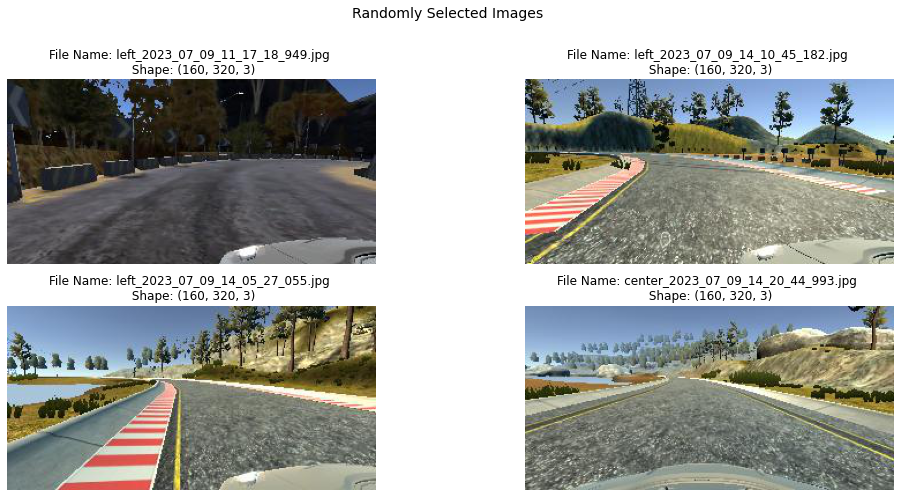

In [10]:
show_random_images()

## Data Augmentation

In [11]:
from torchvision import transforms

# Data Augmentation
transform = transforms.Compose([
    transforms.Resize((70, 320)),
    # Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),
    # Randomly adjust brightness, contrast, saturation, and hue
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    # Convert image to tensor
    transforms.ToTensor(),
])

In [12]:
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Data(Dataset):

    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        center_img, steering_angle_center = Image.open(self.data['center_img'].iloc[idx]), self.data['steering'].iloc[idx]
        left_img, steering_angle_left     = Image.open(self.data['left_img'].iloc[idx]), self.data['steering'].iloc[idx] + 0.4
        right_img, steering_angle_right   = Image.open(self.data['right_img'].iloc[idx]), self.data['steering'].iloc[idx] - 0.4

        center_img = self.transform(center_img)
        left_img   = self.transform(left_img)
        right_img  = self.transform(right_img)

        return (center_img, steering_angle_center), (left_img, steering_angle_left), (right_img, steering_angle_right)

In [13]:
from sklearn.model_selection import train_test_split

# Load the data and create data loaders 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Training data
train_dataset = Data(train_data, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Modeling

In [14]:
import torch
from torch import nn

class LaneDetectionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, 5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, 3),
            nn.ELU(),
            nn.Conv2d(64, 64, 3),
            nn.Dropout(0.5)
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=64 * 2 * 33, out_features=100),
            nn.ELU(),
            nn.Linear(in_features=100, out_features=50),
            nn.ELU(),
            nn.Linear(in_features=50, out_features=10),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, img):
        img = img.view(img.size(0), 3, 70, 320)
        output = self.conv_layers(img)
        output = output.view(output.size(0), -1)
        output = self.linear_layers(output)
        return output

In [15]:
# Initialize the model and other components
model = LaneDetectionModel()
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [16]:
# Setup device training
device = "cuda" if torch.cuda.is_available() else "cpu"

# Train the model

### Setup Learning Rate Scheduling

In [17]:
from torch.optim.lr_scheduler import MultiStepLR

# scheduler
scheduler = MultiStepLR(optimizer, milestones=[30, 50], gamma=0.1)

In [18]:
EPOCHS = 50
START_EPOCH = 0
train_loss_values = []

for epoch in range(EPOCHS):
    # Training
    train_loss = 0.0
    model.train()

    for batch, (centers, lefts, rights) in enumerate(train_dataloader):
        optimizer.zero_grad()
        scheduler.step()
        datas = [centers, lefts, rights]
        for data in datas:
            imgs, angles = data
            imgs.to(device)
            train_pred = model(imgs)
            loss = loss_func(train_pred, angles.unsqueeze(1))
            loss.backward()
            optimizer.step()

            train_loss += loss.data.item()

        if batch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {train_loss / (batch + 1)}")
     
    print()
    train_loss_values.append(loss.data.item())
    # Save model checkpoint
    if epoch % 2 == 0:
        state = {
            'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict(),
        }


        print("--------"*3)
        print("Saving model checkpoint")
        print("--------"*3)
        if not os.path.exists('models/'):
            os.makedirs('models/')
        torch.save(state,f'models/model-train-checkpoint-{state["epoch"]}.h5')

/opt/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0 | Loss: 2.062904596002682
Epoch: 0 | Loss: 1.1890172489770892
Epoch: 0 | Loss: 1.141923413462194
Epoch: 0 | Loss: 1.1300378828512334
Epoch: 0 | Loss: 1.1223353063803945
Epoch: 0 | Loss: 1.1210042873197714
Epoch: 0 | Loss: 1.1213611635002327
Epoch: 0 | Loss: 1.1173735161873657

------------------------
Saving model checkpoint
------------------------
Epoch: 1 | Loss: 1.2072368310952069
Epoch: 1 | Loss: 1.113341562620833
Epoch: 1 | Loss: 1.1093494587930235
Epoch: 1 | Loss: 1.1111238573680666
Epoch: 1 | Loss: 1.1105961520308318
Epoch: 1 | Loss: 1.110880391757751
Epoch: 1 | Loss: 1.1090516027622983
Epoch: 1 | Loss: 1.110621828158413

Epoch: 2 | Loss: 1.079349966280037
Epoch: 2 | Loss: 1.1026046028799354
Epoch: 2 | Loss: 1.1033526238429934
Epoch: 2 | Loss: 1.1043552167997273
Epoch: 2 | Loss: 1.1070572632350022
Epoch: 2 | Loss: 1.106071546640832
Epoch: 2 | Loss: 1.1064452261591649
Epoch: 2 | Loss: 1.1080564799985586

------------------------
Saving model checkpoint
-----------------


------------------------
Saving model checkpoint
------------------------
Epoch: 25 | Loss: 0.4856419710846186
Epoch: 25 | Loss: 0.5123767659772039
Epoch: 25 | Loss: 0.5177947956146695
Epoch: 25 | Loss: 0.515366693260552
Epoch: 25 | Loss: 0.517853614077008
Epoch: 25 | Loss: 0.5199988584310067
Epoch: 25 | Loss: 0.5206153839609017
Epoch: 25 | Loss: 0.5196351215768408

Epoch: 26 | Loss: 0.5437786592624873
Epoch: 26 | Loss: 0.49326097214379017
Epoch: 26 | Loss: 0.5124979793285481
Epoch: 26 | Loss: 0.5178662990053179
Epoch: 26 | Loss: 0.5248899469290741
Epoch: 26 | Loss: 0.5235412496092717
Epoch: 26 | Loss: 0.5223486489209538
Epoch: 26 | Loss: 0.5209854603395515

------------------------
Saving model checkpoint
------------------------
Epoch: 27 | Loss: 0.4511786892738986
Epoch: 27 | Loss: 0.5046710009930875
Epoch: 27 | Loss: 0.5069581259670903
Epoch: 27 | Loss: 0.4965399635873759
Epoch: 27 | Loss: 0.5037093413662943
Epoch: 27 | Loss: 0.5092413108154444
Epoch: 27 | Loss: 0.5143443451028539

Epoch: 49 | Loss: 0.5144688852627123
Epoch: 49 | Loss: 0.5128745539235998
Epoch: 49 | Loss: 0.5120261224013941
Epoch: 49 | Loss: 0.5113176508533313



In [19]:
try: 
    import torchinfo
except:
    import torchinfo
    
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
LaneDetectionModel                       --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,824
│    └─ELU: 2-2                          --
│    └─Conv2d: 2-3                       21,636
│    └─ELU: 2-4                          --
│    └─Conv2d: 2-5                       43,248
│    └─ELU: 2-6                          --
│    └─Conv2d: 2-7                       27,712
│    └─ELU: 2-8                          --
│    └─Conv2d: 2-9                       36,928
│    └─Dropout: 2-10                     --
├─Sequential: 1-2                        --
│    └─Linear: 2-11                      422,500
│    └─ELU: 2-12                         --
│    └─Linear: 2-13                      5,050
│    └─ELU: 2-14                         --
│    └─Linear: 2-15                      510
│    └─Linear: 2-16                      11
Total params: 559,419
Trainable params: 559,419
Non-trainable params: 0

### Model Evaluation

In [20]:
# Test data
resize = transforms.Compose([
    transforms.Resize((70, 320)),
    transforms.ToTensor(),
])

test_dataset = Data(test_data, transform=resize)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [21]:
test_loss_values = []
for epoch in range(EPOCHS):
    model.eval()
    test_loss = 0.0
    with torch.inference_mode():
        for batch, (centers, lefts, rights) in enumerate(test_dataloader):
            optimizer.zero_grad()
            datas = [centers, lefts, rights]
            for data in datas:
                imgs, angles = data
                imgs.to(device)
                outputs = model(imgs)
                val_loss = loss_func(outputs, angles.unsqueeze(1))

                test_loss += val_loss.data.item()
            
            if batch % 100 == 0:
                print(f"Epoch: {epoch} | Loss: {test_loss / (batch + 1)}")
    test_loss_values.append(val_loss.data.item())
    if epoch % 2 == 0:
        print('---------'*3)

Epoch: 0 | Loss: 0.4107842405189145
Epoch: 0 | Loss: 0.5141410813176893
---------------------------
Epoch: 1 | Loss: 0.4107842405189145
Epoch: 1 | Loss: 0.5141410813176893
Epoch: 2 | Loss: 0.4107842405189145
Epoch: 2 | Loss: 0.5141410813176893
---------------------------
Epoch: 3 | Loss: 0.4107842405189145
Epoch: 3 | Loss: 0.5141410813176893
Epoch: 4 | Loss: 0.4107842405189145
Epoch: 4 | Loss: 0.5141410813176893
---------------------------
Epoch: 5 | Loss: 0.4107842405189145
Epoch: 5 | Loss: 0.5141410813176893
Epoch: 6 | Loss: 0.4107842405189145
Epoch: 6 | Loss: 0.5141410813176893
---------------------------
Epoch: 7 | Loss: 0.4107842405189145
Epoch: 7 | Loss: 0.5141410813176893
Epoch: 8 | Loss: 0.4107842405189145
Epoch: 8 | Loss: 0.5141410813176893
---------------------------
Epoch: 9 | Loss: 0.4107842405189145
Epoch: 9 | Loss: 0.5141410813176893
Epoch: 10 | Loss: 0.4107842405189145
Epoch: 10 | Loss: 0.5141410813176893
---------------------------
Epoch: 11 | Loss: 0.4107842405189145
E

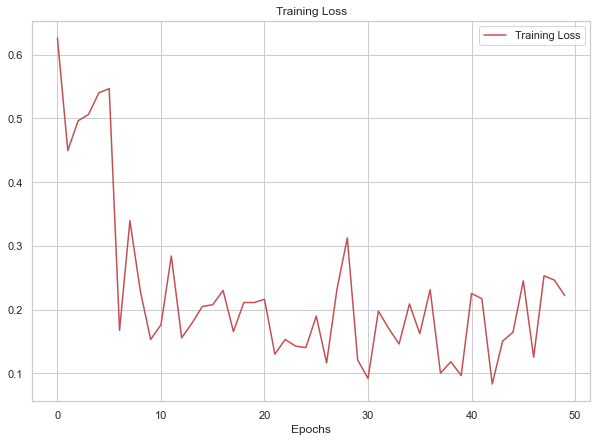

In [37]:
import seaborn as sns;
import numpy as np

sns.set_style("whitegrid")

plt.figure(figsize=(10,7))
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.plot(range(len(train_loss_values)), np.array(train_loss_values), 'r', label='Train Loss')
plt.legend()
plt.show()

In [41]:
train_loss

398.4257183400467

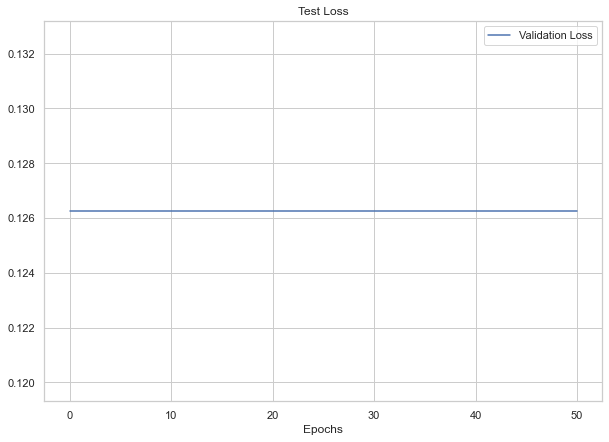

In [40]:
plt.figure(figsize=(10,7))

plt.title("Test Loss")
plt.xlabel("Epochs")
plt.plot(np.linspace(0, len(train_loss_values), len(test_loss_values)), np.array(test_loss_values), label='Validation Loss')
plt.legend()
plt.show()